# 数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(233)
x=np.random.uniform(-4,2,size=(100))
y=x**2+4*x+3+2*np.random.randn(100)
X=x.reshape(-1,1)

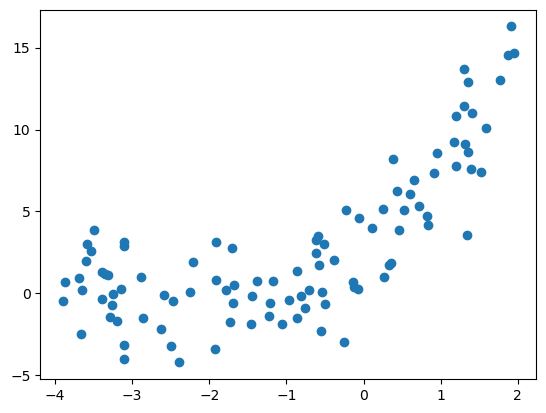

In [3]:
plt.scatter(x,y)
plt.show()

# 线性回归与多项式回归

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Degree: 1 Score: 0.5273556058762797
Degree: 2 Score: 0.7961121480231473
Degree: 5 Score: 0.802124730174001
Degree: 20 Score: 0.8358688138329252


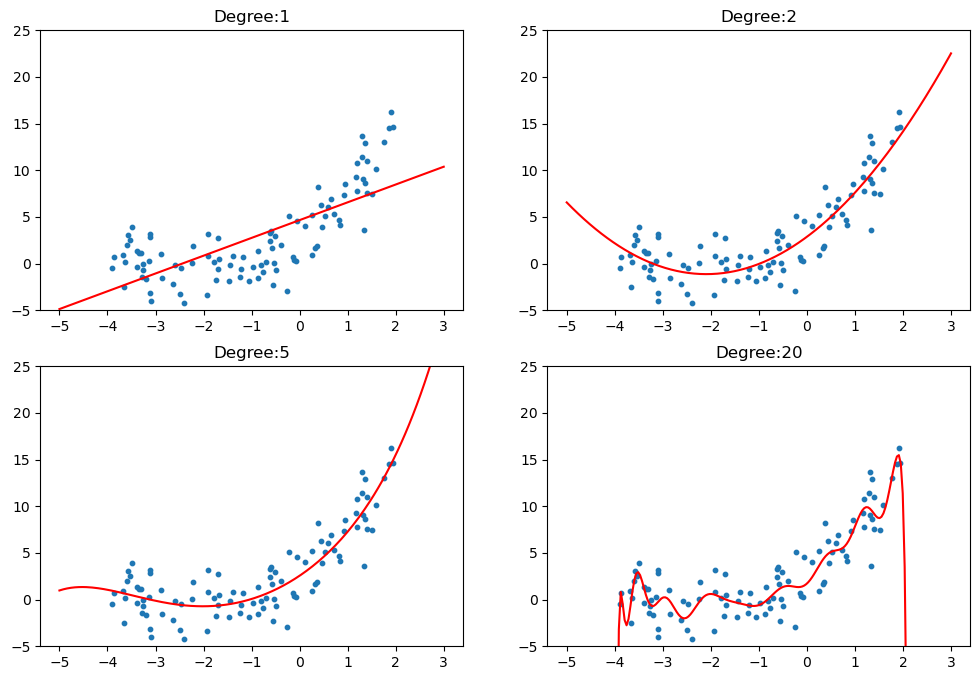

In [5]:
plt.rcParams["figure.figsize"]=(12,8)
degrees=[1,2,5,20]
for i,degree in enumerate(degrees):
    polynomial_features=PolynomialFeatures(degree=degree)
    X_poly=polynomial_features.fit_transform(X)
    
    lin_reg=LinearRegression()
    lin_reg.fit(X_poly,y)
    
    X_new=np.linspace(-5,3,200).reshape(-1,1)
    X_new_poly=polynomial_features.fit_transform(X_new)
    y_predict=lin_reg.predict(X_new_poly)
    
    plt.subplot(2,2,i+1)
    plt.title("Degree:{0}".format(degree))
    plt.scatter(x,y,s=10)
    plt.ylim(-5,25)
    plt.plot(X_new,y_predict,c='r')
    
    print("Degree:",degree,"Score:",lin_reg.score(X_poly,y))
plt.show()

# 划分数据集

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=233)

In [7]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((70,), (30,), (70,), (30,))

# 学习曲线

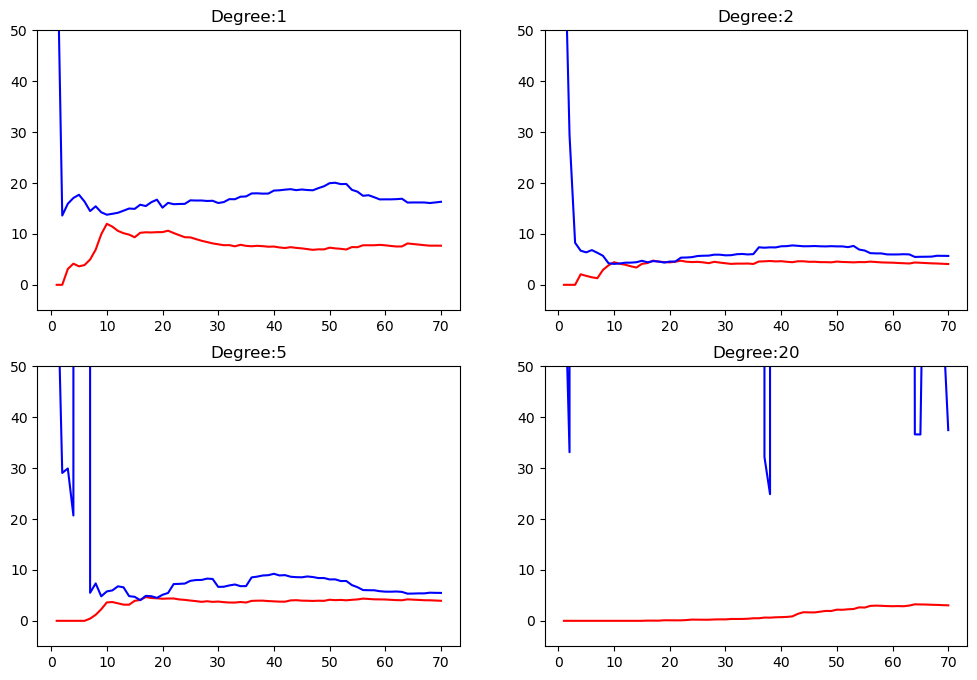

In [10]:
from sklearn.metrics import mean_squared_error

plt.rcParams["figure.figsize"]=(12,8)

degrees=[1,2,5,20]
for i,degree in enumerate(degrees):
    polynomial_features=PolynomialFeatures(degree=degree)
    
    X_poly_train=polynomial_features.fit_transform(x_train.reshape(-1,1))
    X_poly_test=polynomial_features.fit_transform(x_test.reshape(-1,1))
    
    train_error,test_error=[],[]
    for k in range(len(x_train)):
        lin_reg=LinearRegression()
        lin_reg.fit(X_poly_train[:k+1],y_train[:k+1])#在每个多项式次数下，使用线性回归模型 LinearRegression() 对部分训练数据进行拟合，其中训练数据的数量逐渐增加。
        
        y_train_pred=lin_reg.predict(X_poly_train[:k+1])
        train_error.append(mean_squared_error(y_train[:k+1],y_train_pred))
        
        y_test_pred=lin_reg.predict(X_poly_test)
        test_error.append(mean_squared_error(y_test,y_test_pred))
    
    plt.subplot(2,2,i+1)
    plt.title("Degree:{0}".format(degree))
    plt.ylim(-5,50)
    plt.plot([k+1 for k in range(len(x_train))],train_error,c='r',label='train')
    plt.plot([k+1 for k in range(len(x_train))],test_error,c='b',label='test')
plt.show()

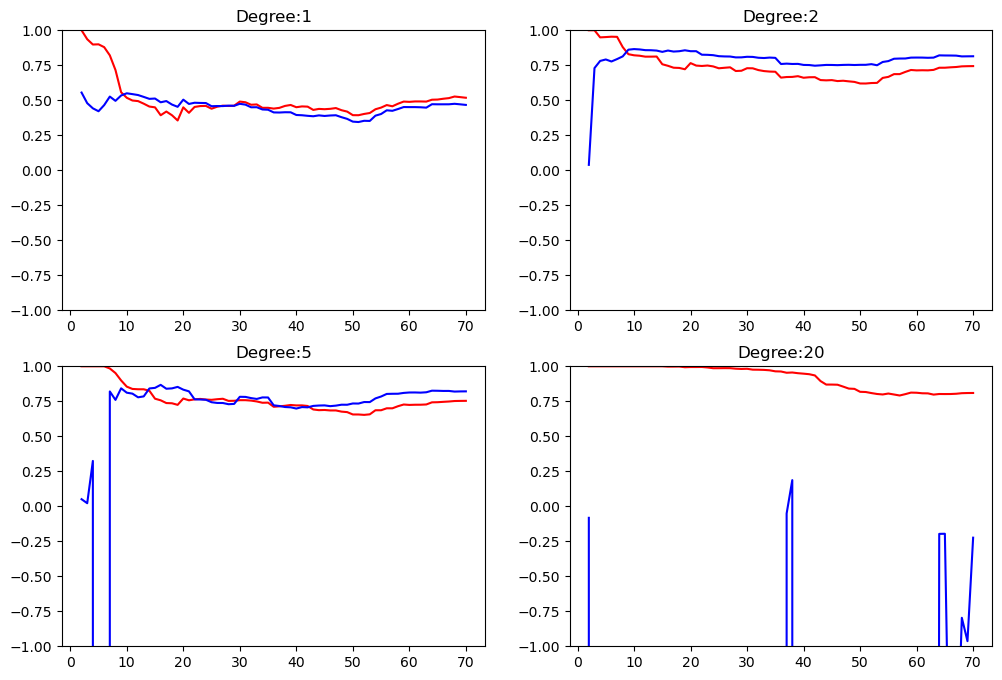

In [11]:
from sklearn.metrics import mean_squared_error

plt.rcParams["figure.figsize"]=(12,8)

degrees=[1,2,5,20]
for i,degree in enumerate(degrees):
    polynomial_features=PolynomialFeatures(degree=degree)
    
    X_poly_train=polynomial_features.fit_transform(x_train.reshape(-1,1))
    X_poly_test=polynomial_features.fit_transform(x_test.reshape(-1,1))
    
    train_error,test_error=[],[]
    for k in range(1,len(x_train)):
        lin_reg=LinearRegression()
        lin_reg.fit(X_poly_train[:k+1],y_train[:k+1])
        
        y_train_pred=lin_reg.predict(X_poly_train[:k+1])
        train_error.append(lin_reg.score(X_poly_train[:k+1],y_train[:k+1]))
        y_test_pred=lin_reg.predict(X_poly_test)
        test_error.append(lin_reg.score(X_poly_test,y_test))
    
    plt.subplot(2,2,i+1)
    plt.title("Degree:{0}".format(degree))
    plt.ylim(-1,1)
    plt.plot([k+1 for k in range(1,len(x_train))],train_error,c='r',label='train')
    plt.plot([k+1 for k in range(1,len(x_train))],test_error,c='b',label='test')
plt.show()